<a href="https://colab.research.google.com/github/arashakbari1234/Data-Mining/blob/main/Assignment_3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv('./drive/MyDrive/Data Mining Course - Exercises/Exercise 3/first_clustering_dataset.csv')
df2 = pd.read_csv('./drive/MyDrive/Data Mining Course - Exercises/Exercise 3/second_clustering_dataset.csv')
df3 = pd.read_csv('./drive/MyDrive/Data Mining Course - Exercises/Exercise 3/third_clustering_dataset.csv')

In [ ]:
df1 = df1.shift(periods=1, freq=None)
df1.iloc[0] = [round(float(df1.columns[0]), 6), round(float(df1.columns[1]), 6)]
df1.columns = ['a', 'b']
df1.head()

,a,b
0,-0.125391,-1.268829
1,0.062522,1.278778
2,-0.048762,0.200549
3,0.105585,-0.496629
4,0.011886,-0.739317


In [ ]:
df2 = df2.shift(periods=1, freq=None)
df2.iloc[0] = [round(float(df2.columns[0]), 6), round(float(df2.columns[1]), 6)]
df2.columns = ['a', 'b']
df2.head()

,a,b
0,1.047961,0.357217
1,0.201221,0.295197
2,0.163506,-1.846756
3,0.876857,1.499314
4,1.389838,0.092843


In [ ]:
df3 = df3.shift(periods=1, freq=None)
df3.iloc[0] = [round(float(df3.columns[0]), 6), round(float(df3.columns[1]), 6)]
df3.columns = ['a', 'b']
df3.head()

,a,b
0,0.315715,0.230080
1,-0.420268,0.609144
2,0.102944,-1.117928
3,-0.105657,-0.112488
4,-0.674778,0.130790


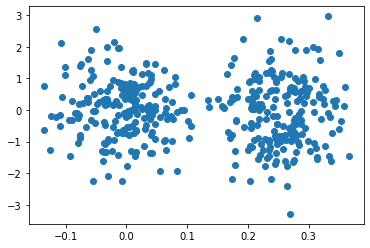

In [ ]:
plt.scatter(df1['a'], df1['b'])

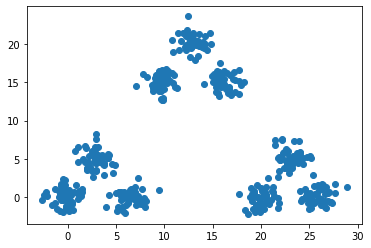

In [ ]:
plt.scatter(df2['a'], df2['b'])

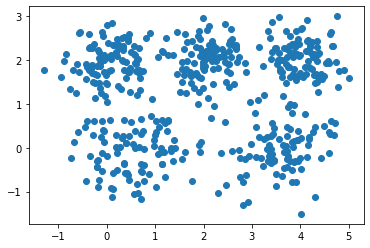

In [ ]:
plt.scatter(df3['a'], df3['b'])

We have three primary types of clustering. Partial Clustring, Hierarchical Clustering and Density-based clustering. In the first dataset there are a few data points which makes it hard to find the suitable K. But from density-based point of view, K=2 is the most suitable. In the second datset, the suitable K can be either 3 or 9. And in the last dataset, there 5 densed data point groups. So the best K is 5. if we use well-seperated clustering, k=3 is more convinience for the last dataset. for other data set if we use center-base or contiguity-base clustering algorithms, we should have the same K that we discussed in the density-based algorithms.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler1 = StandardScaler()
scaled_df1 = scaler1.fit_transform(df1)

# scaled_df3 = scaler.fit_transform(df3)

In [ ]:
from sklearn.cluster import KMeans

## Part 2

In [ ]:
kmeans1 = KMeans(n_clusters=2)
cluster_labels = kmeans1.fit_predict(scaled_df1)
df1['Cluster'] = cluster_labels

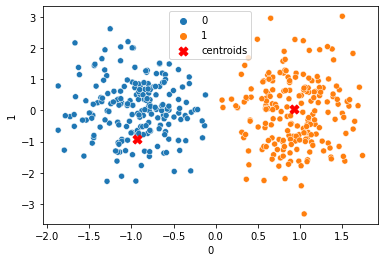

In [ ]:
sns.scatterplot(data=pd.DataFrame(scaled_df1), x=0, y=1, hue=kmeans1.labels_)

plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
print("the SSE is: ", kmeans1.inertia_)

the SSE is:  451.71516046005445


In [ ]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df1[['a','b']], kmeans1.labels_)
print(score)

0.05189709854502574


In [ ]:
scaler2 = StandardScaler()
scaled_df2 = scaler2.fit_transform(df2)
kmeans2 = KMeans(n_clusters=3, random_state=101)
cluster_labels = kmeans2.fit_predict(df2)
df2['Cluster'] = cluster_labels

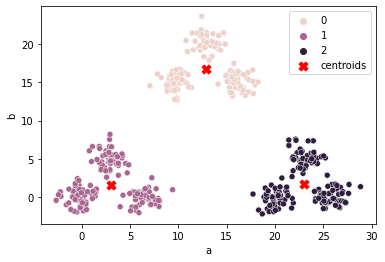

In [ ]:
sns.scatterplot(data=df2, x="a", y="b", hue=kmeans2.labels_)
plt.scatter(kmeans2.cluster_centers_[:,0], kmeans2.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
print("the SSE is: ", kmeans2.inertia_)

the SSE is:  6477.5087192669735


In [ ]:
score = silhouette_score(df2[['a','b']], kmeans2.labels_)
print(score)

0.7237585789911185


In [ ]:
scaler3 = StandardScaler()
scaled_df3 = scaler3.fit_transform(df3)
kmeans3 = KMeans(n_clusters=5)
cluster_labels = kmeans3.fit_predict(df3)
df3['Cluster'] = cluster_labels

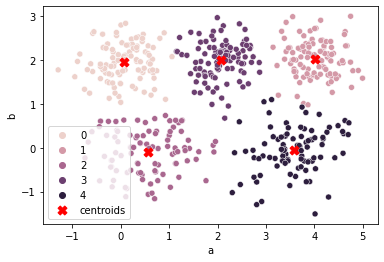

In [ ]:
sns.scatterplot(data=df3, x="a", y="b", hue=kmeans3.labels_)
plt.scatter(kmeans3.cluster_centers_[:,0], kmeans3.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

In [ ]:
print("the SSE is: ", kmeans3.inertia_)

the SSE is:  222.0299140383519


In [ ]:
score = silhouette_score(df3[['a','b']], kmeans3.labels_)
print(score)

0.5605170981386649


In [ ]:
ssd1 = []
ssd2 = []
ssd3 = []

for k in range(1,15):
  min1 = 10000
  min2 = 10000
  min3 = 10000
  for i in range(1,200):
    model1 = KMeans(n_clusters=k)
    model1.fit(scaled_df1)
    model2 = KMeans(n_clusters=k)
    model2.fit(scaled_df2)
    model3 = KMeans(n_clusters=k)
    model3.fit(scaled_df3)
    if (model1.inertia_ < min1):
      min1 = model1.inertia_
    if (model2.inertia_ < min2):
      min2 = model2.inertia_
    if (model3.inertia_ < min3):
      min3 = model3.inertia_
      
  ssd1.append(min1)
  ssd2.append(min2)
  ssd3.append(min3)

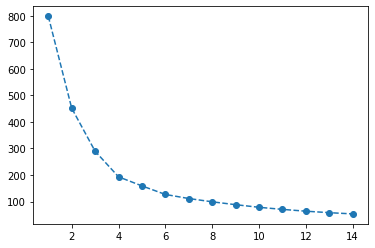

In [ ]:
plt.plot(range(1,15),ssd1, 'o--')

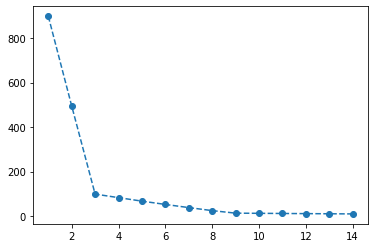

In [ ]:
plt.plot(range(1,15),ssd2, 'o--')

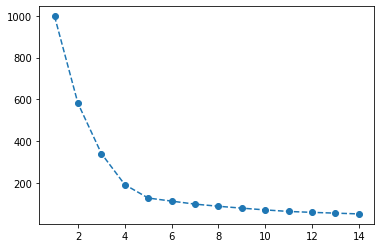

In [ ]:
plt.plot(range(1,15),ssd3, 'o--')

So the best k for the models are 2, 3, and 5.

In [ ]:
model = KMeans(n_clusters=2)
cluster_labels = model.fit_predict(scaled_df1)
df1['Cluster'] = cluster_labels

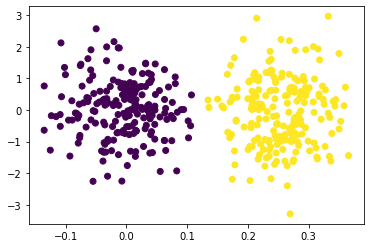

In [ ]:
plt.scatter(x=df1['a'], y=df1['b'],c=df1['Cluster'])

In [ ]:
print("the SSE is: ", ssd1[2])

the SSE is:  289.59865271010426


In [ ]:
model = KMeans(n_clusters=3)
cluster_labels = model.fit_predict(scaled_df2)
df2['Cluster'] = cluster_labels

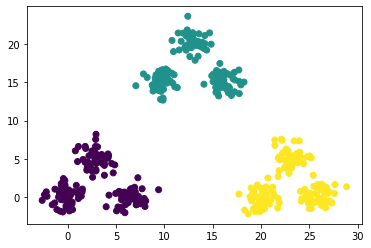

In [ ]:
plt.scatter(x=df2['a'], y=df2['b'],c=df2['Cluster'])

In [ ]:
print("the SSE is: ", ssd2[3])

the SSE is:  83.07324424997257


In [ ]:
model = KMeans(n_clusters=5)
cluster_labels = model.fit_predict(scaled_df3)
df3['Cluster'] = cluster_labels

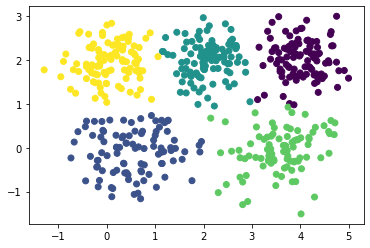

In [ ]:
plt.scatter(x=df3['a'], y=df3['b'],c=df3['Cluster'])

In [ ]:
print("the SSE is: ", ssd3[5])

the SSE is:  112.27024032338582


## Fuzzy C-means

In [ ]:
! pip install fuzzy-c-means

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from fcmeans import FCM

In [ ]:
min = 10000
for i in range(1,200):
  scaler = StandardScaler()
  scaled_df1 = scaler.fit_transform(df1)

  fcm = FCM(n_clusters=2)
  fcm.fit(scaled_df1)
  fcm_labels = fcm.predict(scaled_df1)
  score = silhouette_score(df1[['a','b']], fcm_labels)
  if min > score:
    min = score

In [ ]:
print(min)

0.05189709854502574


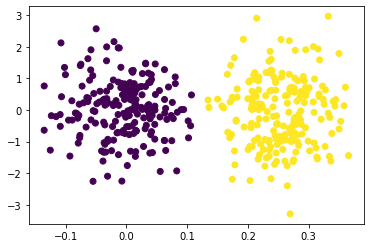

In [ ]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(scaled_df1)
df1['Cluster1'] = fcm_labels
plt.scatter(x=df1['a'], y=df1['b'],c=df1['Cluster'])

In [ ]:
score = silhouette_score(df1[['a','b']], fcm_labels)
print(score)

0.05189709854502574


In [ ]:
min = 10000
for i in range(1,200):
  scaler = StandardScaler()
  scaled_df2 = scaler.fit_transform(df2)

  fcm = FCM(n_clusters=3)
  fcm.fit(scaled_df2)
  fcm_labels = fcm.predict(scaled_df2)
  score = silhouette_score(df2[['a','b']], fcm_labels)
  if min > score:
    min = score

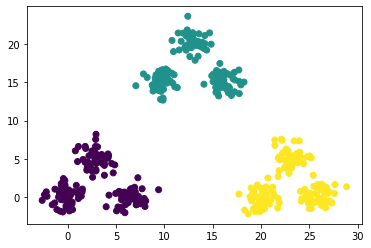

In [ ]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(scaled_df2)
df2['Cluster1'] = fcm_labels
plt.scatter(x=df2['a'], y=df2['b'],c=df2['Cluster'])

In [ ]:
score = silhouette_score(df2[['a','b']], fcm_labels)
print(score)

0.7237585789911185


In [ ]:
min = 10000
for i in range(1,200):
  scaler = StandardScaler()
  scaled_df3 = scaler.fit_transform(df3)

  fcm = FCM(n_clusters=5)
  fcm.fit(scaled_df3)
  fcm_labels = fcm.predict(scaled_df3)
  score = silhouette_score(df3[['a','b']], fcm_labels)
  if min > score:
    min = score

In [ ]:
print(min)

0.5593602617263356


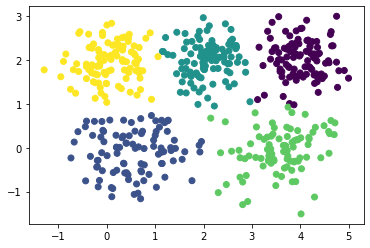

In [ ]:
fcm_centers = fcm.centers
fcm_labels = fcm.predict(scaled_df3)
df3['Cluster1'] = fcm_labels
plt.scatter(x=df3['a'], y=df3['b'],c=df3['Cluster'])

In [ ]:
score = silhouette_score(df3[['a','b']], fcm_labels)
print(score)

0.5593602617263356


## DBSCAN

Running DBSCAN multiple times doesn't affect the result so we just need to run it one time and tune the hyperparameters in a way that the result be the first thing we expected to be.

In [ ]:
def display_categories(model, data):
  labels = model.fit_predict(data)
  sns.scatterplot(data=data, x="a", y="b", hue=labels, palette='Set1')

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
model = DBSCAN(eps=1)
labels1 = model.fit_predict(df1)

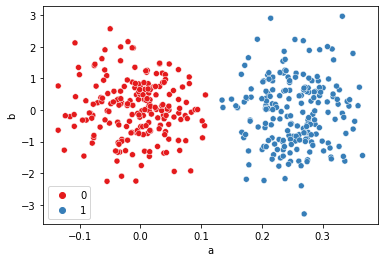

In [ ]:
display_categories(model, df1)

In [ ]:
score = silhouette_score(df1[['a','b']], labels1)
print(score)

0.05189709854502574


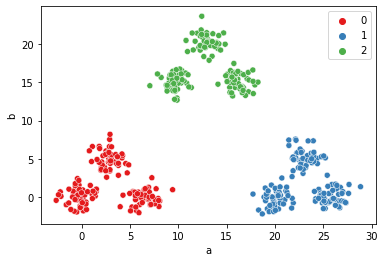

In [ ]:
model2 = DBSCAN(eps=3)
labels2 = model.fit_predict(df2)
display_categories(model2, df2)

In [ ]:
score = silhouette_score(df2[['a','b']], labels2)
print(score)

0.6171165949792786


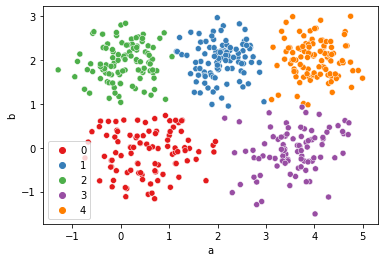

In [ ]:
model = DBSCAN(eps=0.7)
labels3 = model.fit_predict(df3)
display_categories(model, df3)

In [ ]:
score = silhouette_score(df3[['a','b']], labels3)
print(score)

0.5593602617263356


### Concolusion


First of all the first two algorithms can't be compared with DBSCAN and the main reason is because DBSCAN is a density based clustering algorithm and SSE is and error based on distance(not density). Each algorithm has its own pros and cons. For instance K-means clustering is sensitive to the number of clusters specified but Number of clusters don't need to be specified. Also DBScan clustering efficiently handles outliers and noisy datasets. 

Also in the first two clustering algorithms, we needed to normalized the dataset in order to get the expected clustering in first dataset. However, in DBSCAN normalizatin wasn't necessary because it's a density based algorithm.

Also if our dataset has any outlier, DBSCAN is the best to identify them.

There are other validation metrics to compare all clustering algorithms such as Silhouette Score wich is printed in each part of the algorithms.

Concolusion: In high dimentional and more complex clustering problems DBSCAN works better but in this example k-means actually works pretty well. The fact that we should know K value before clustering is kind of a drawback. But tuning DBSCAN hyperparameters can sometimes be hard to find.
DBSCAN and Fuzzy c-means works better when the data has outliers.